<a href="https://colab.research.google.com/github/Celtao123/22b1278-SOC--159/blob/main/TimeSeriesDecompostion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly.express as px
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [ ]:
from google.colab import files
files.upload()

Saving AirPassengers.csv to AirPassengers.csv


{'AirPassengers.csv': b'Month,#Passengers\n1949-01,112\n1949-02,118\n1949-03,132\n1949-04,129\n1949-05,121\n1949-06,135\n1949-07,148\n1949-08,148\n1949-09,136\n1949-10,119\n1949-11,104\n1949-12,118\n1950-01,115\n1950-02,126\n1950-03,141\n1950-04,135\n1950-05,125\n1950-06,149\n1950-07,170\n1950-08,170\n1950-09,158\n1950-10,133\n1950-11,114\n1950-12,140\n1951-01,145\n1951-02,150\n1951-03,178\n1951-04,163\n1951-05,172\n1951-06,178\n1951-07,199\n1951-08,199\n1951-09,184\n1951-10,162\n1951-11,146\n1951-12,166\n1952-01,171\n1952-02,180\n1952-03,193\n1952-04,181\n1952-05,183\n1952-06,218\n1952-07,230\n1952-08,242\n1952-09,209\n1952-10,191\n1952-11,172\n1952-12,194\n1953-01,196\n1953-02,196\n1953-03,236\n1953-04,235\n1953-05,229\n1953-06,243\n1953-07,264\n1953-08,272\n1953-09,237\n1953-10,211\n1953-11,180\n1953-12,201\n1954-01,204\n1954-02,188\n1954-03,235\n1954-04,227\n1954-05,234\n1954-06,264\n1954-07,302\n1954-08,293\n1954-09,259\n1954-10,229\n1954-11,203\n1954-12,229\n1955-01,242\n1955-02,

In [ ]:
##indexing the date and  converting into standard datetime format for time series analysis
data= pd.read_csv('AirPassengers.csv',index_col=0)
data.index = pd.to_datetime(data.index)

In [ ]:
fig = px.line(data, x=data.index, y='#Passengers', labels={'#Passengers': 'Passengers', 'Month': 'Date'})
fig.update_layout(template="simple_white", font=dict(size=18), title_text='Airline Passengers', width=650, title_x=0.5, height=400)
fig.show()


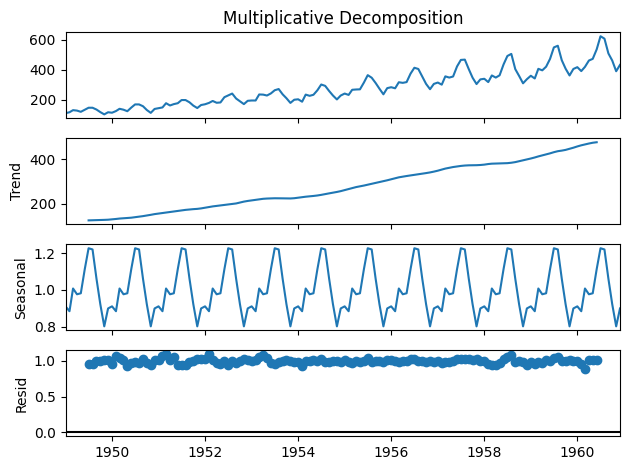

In [ ]:
##Lets start multiplicative decomplostion:-
data.rename(columns={'#Passengers':'Multiplicative Decomposition'},inplace=True)
decomposition_plot_multi= seasonal_decompose(data['Multiplicative Decomposition'],model='multiplicative')
decomposition_plot_multi.plot()
plt.show()

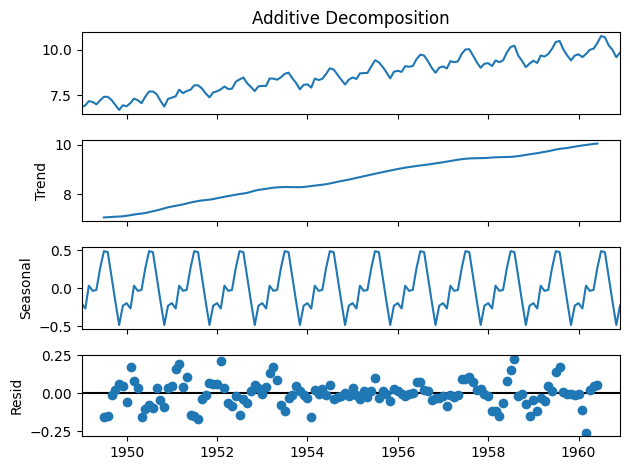

In [ ]:
##ADDITIVE-we can convert our series to an additive model by stabilising the variance using the box-cox  transform by applying the boxcox scipy funxn
##apply the boxcox to acquire additive model
data['Additive Decomposition'], lam = boxcox(data['Multiplicative Decomposition'])
##plot the decomposition for additive series
decomposition_plot_add = seasonal_decompose(data['Additive Decomposition'],model='additive')
decomposition_plot_add.plot()
plt.show()